In [167]:
%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import csv

plt.rcParams["figure.dpi"] = 120
print(ct.__version__)

3.0.0


In [181]:
molar_mass_CH4 = 16.04
molar_mass_O2 = 32.00
stoichiometric_ratio = molar_mass_CH4 / (2 * molar_mass_O2)

mixture_ratio = np.linspace(0, 8.0, 100)
equivalence_ratio = mixture_ratio * stoichiometric_ratio
gas = ct.Solution('gri30.yaml')
gox = "O2:1"
methane = "CH4:1"

Adiabatic_flame_temp = np.zeros(mixture_ratio.shape)
gamma_mix = np.zeros(mixture_ratio.shape)
MW_mix = np.zeros(mixture_ratio.shape)
Gas_const = np.zeros(mixture_ratio.shape)
for i in range(len(mixture_ratio)):
    gas.TP = 300, 101325*1
    gas.set_equivalence_ratio(equivalence_ratio[i] , methane, gox)
    gas.equilibrate("HP") # Adiabatic since holding H constant
    Adiabatic_flame_temp[i] = gas.T
    gamma_mix[i] = gas.cp / gas.cv
    MW_mix[i] = gas.mean_molecular_weight
    Gas_const[i] = 8314.5/MW_mix[i]

Text(0.5, 1.0, 'Adibatic Flame Temperauture vs. Mixture Ratio for CH4/O2')

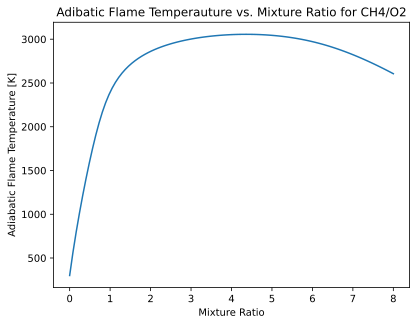

In [182]:
plt.plot(mixture_ratio, Adiabatic_flame_temp)
plt.ylabel("Adiabatic Flame Temperature [K]")
plt.xlabel("Mixture Ratio")
plt.title('Adibatic Flame Temperauture vs. Mixture Ratio for CH4/O2')